In [1]:
# from google.colab import drive
# import zipfile
# import os


# drive.mount('/content/drive')

# zip_path = '/content/drive/MyDrive/apredizajeautomatico/QuickDraw-Animals.zip'  # Cambia esta ruta
# zip_path_2 = '/content/drive/MyDrive/apredizajeautomatico/QuickDraw-10-Tarea2.zip'

# extract_path = '/content/imagenes_descomprimidas'
# os.makedirs(extract_path, exist_ok=True)

# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_path)

# with zipfile.ZipFile(zip_path_2, 'r') as zip_ref:
#     zip_ref.extractall(extract_path)

# print(f"Archivos extraídos en: {extract_path}")

# print("Archivos extraídos:")
# print(os.listdir(extract_path))

In [ ]:
# importacion de librerias
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping


# Parte 1 - Lectura de Imágenes

In [3]:
def load_image_paths_and_labels(file_path):
    """Carga las rutas de las imágenes y las etiquetas desde un archivo de texto."""
    image_paths = []
    labels = []
    with open(file_path, 'r') as file:
        for line in file.readlines():
            path, label = line.strip().split('\t')
            image_paths.append(path)
            labels.append(int(label))
    return image_paths, np.array(labels)

def load_images(image_paths, folder_route):
    """Carga las imágenes y las aplana a vectores."""
    images = []
    for path in image_paths:
        with Image.open(folder_route + path) as img:
            img_array = np.array(img).reshape(-1)
            images.append(img_array)
    return np.array(images)

QuickDraw-10

In [4]:
# # Cargar las rutas de entrenamiento y prueba junto con las etiquetas
# train_image_paths_10, train_labels_10 = load_image_paths_and_labels("/content/imagenes_descomprimidas/QuickDraw-10/train.txt")
# test_image_paths_10, test_labels_10 = load_image_paths_and_labels("/content/imagenes_descomprimidas/QuickDraw-10/test.txt")

# # Cargar y procesar las imágenes
# train_images_10 = load_images(train_image_paths_10, "/content/imagenes_descomprimidas/QuickDraw-10/")
# test_images_10 = load_images(test_image_paths_10, "/content/imagenes_descomprimidas/QuickDraw-10/")


# Cargar las rutas de entrenamiento y prueba junto con las etiquetas
train_image_paths_10, train_labels_10 = load_image_paths_and_labels("./QuickDraw-10/train.txt")
test_image_paths_10, test_labels_10 = load_image_paths_and_labels("./QuickDraw-10/test.txt")

# Cargar y procesar las imágenes
train_images_10 = load_images(train_image_paths_10, "./QuickDraw-10/")
test_images_10 = load_images(test_image_paths_10, "./QuickDraw-10/")

In [5]:
# Preparacion datos de validacion
train_images_10, val_image_10, train_labels_10, val_labels_10 = train_test_split(
    train_images_10, train_labels_10, test_size=0.15, random_state=42, stratify=train_labels_10
)

In [6]:
# normalizacion
train_images_10 = train_images_10.astype('float32') / 255.0
test_images_10 = test_images_10.astype('float32') / 255.0
val_image_10 = val_image_10.astype('float32') / 255.0

In [7]:
# one hot encoding
n_classes=10
train_labels_10 = to_categorical(train_labels_10, num_classes=n_classes)
test_labels_10 = to_categorical(test_labels_10, num_classes=n_classes)
val_labels_10 = to_categorical(val_labels_10, num_classes=n_classes)

QuickDraw-Animals

In [8]:
def load_images_and_labels(dataset):
    """
    Carga imágenes y etiquetas para train y test del dataset QuickDraw-Animals.

    Retorna:
      X_test, y_test, X_train, y_train (numpy arrays)
    """
    if dataset != "Animals":
        raise ValueError("Sólo soporta dataset 'Animals'.")

    # base_path = '/content/imagenes_descomprimidas/QuickDraw-Animals/'
    base_path = './QuickDraw-Animals'
    mapping_file = os.path.join(base_path, 'mapping.txt')

    # Leer mapping.txt y crear diccionario etiqueta->número
    label_map = {}
    with open(mapping_file, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) == 2:
                label = parts[0]
                idx = int(parts[1])
                label_map[label] = idx

    def load_images_from_folder(folder_path):
        images = []
        labels = []
        # Las subcarpetas son las clases
        for label_name in sorted(os.listdir(folder_path)):
            label_folder = os.path.join(folder_path, label_name)
            if os.path.isdir(label_folder) and label_name in label_map:
                for img_file in sorted(os.listdir(label_folder)):
                    if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                        img_path = os.path.join(label_folder, img_file)
                        with Image.open(img_path) as img:
                            img_array = np.array(img).reshape(-1)
                            images.append(img_array)
                            labels.append(label_map[label_name])
        return np.array(images), np.array(labels)

    # Cargar test
    # X_test, y_test = load_images_from_folder('/content/imagenes_descomprimidas/QuickDraw-Animals/test_images/test_images/')
    X_test, y_test = load_images_from_folder('./QuickDraw-Animals/test_images/test_images')

    # Cargar train
    # X_train, y_train = load_images_from_folder('/content/imagenes_descomprimidas/QuickDraw-Animals/train_images/train_images/')
    X_train, y_train = load_images_from_folder('./QuickDraw-Animals/train_images/train_images')


    return X_test, y_test, X_train, y_train


In [9]:
test_images_animals, test_labels_animals, train_images_animals, train_labels_animals = load_images_and_labels("Animals")

In [10]:
# Preparacion datos de validacion
train_images_animals, val_images_animals, train_labels_animals, val_labels_animals = train_test_split(
    train_images_animals, train_labels_animals, test_size=0.15, random_state=42, stratify=train_labels_animals
)

In [11]:
# normalizacion
train_images_animals = train_images_animals.astype('float32') / 255.0
test_images_animals = test_images_animals.astype('float32') / 255.0
val_images_animals = val_images_animals.astype('float32') / 255.0

In [12]:
# one hot encoding
n_classes=12
train_labels_animals = to_categorical(train_labels_animals, num_classes=n_classes)
test_labels_animals = to_categorical(test_labels_animals, num_classes=n_classes)
val_labels_animals = to_categorical(val_labels_animals, num_classes=n_classes)

## Parte 2 - Construcción de modelos

Clase MLP

In [ ]:
class MLP(tf.keras.Model):
    # defining components
    def __init__(self, layers_size, n_classes, activation='sigmoid'):
        super(MLP, self).__init__()
        self.layer_list = []
        for lsize in layers_size:
            self.layer_list.append(tf.keras.layers.Dense(lsize))
        self.classifier = tf.keras.layers.Dense(n_classes)
        self.activation = activation


    # defining architecture
    def call(self, inputs):
        x = inputs
        for mlp_layer in self.layer_list:
            x = mlp_layer(x)
            if self.activation == 'sigmoid':
                x = tf.keras.activations.sigmoid(x)
            elif self.activation == 'tanh':
                x = tf.keras.activations.tanh(x)
        x = self.classifier(x)
        return tf.keras.activations.softmax(x)

Funciones para entrenar, evaluar y realizar los experimentos

In [ ]:
def train_model(model, X_train, y_train, X_val, y_val, loss_fn, epochs=10, batch_size=32):
    """
    Entrena el modelo utilizando el optimizador SGD, la función de pérdida especificada y 
    evalúa el modelo utilizando early stopping para evitar el sobreajuste.

    Args:
        model (tf.keras.Model): El modelo a entrenar.
        X_train (numpy.ndarray): Los datos de entrenamiento.
        y_train (numpy.ndarray): Las etiquetas de entrenamiento.
        X_val (numpy.ndarray): Los datos de validación.
        y_val (numpy.ndarray): Las etiquetas de validación.
        loss_fn (function): La función de pérdida a usar durante el entrenamiento.
        epochs (int, opcional): El número de épocas para entrenar el modelo. Por defecto es 10.
        batch_size (int, opcional): El tamaño del lote para el entrenamiento. Por defecto es 32.

    Returns:
        final_model: El modelo entrenado.
    """
     
    # Entrenamiento
    model.compile(
        optimizer=tf.keras.optimizers.SGD(),
        loss=loss_fn,
        metrics=['accuracy']
    )

    # Detiene el proceso tras 5 epocas sin encontrar una mejora. Evalúa la pérdida en el
    # conjunto de validación.
    early_stopping = EarlyStopping(
      monitor='val_loss',
      patience=5,
      restore_best_weights=True,
      verbose=1
    )

    final_model = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stopping]
    )
    return final_model

def evaluate_model(model, X_test, y_test, class_names):
    """
    Evalúa el rendimiento del modelo en el conjunto de test, calculando la precisión total, 
    la precisión por clase y la matriz de confusión.

    Args:
        model (tf.keras.Model): El modelo entrenado.
        X_test (numpy.ndarray): Los datos de test.
        y_test (numpy.ndarray): Las etiquetas de test.
        class_names (list): Los nombres de las clases para etiquetar la matriz de confusión.

    Returns:
        acc_total (float): Precisión total del modelo.
        acc_per_class (dict): Precisión por clase, donde las claves son los nombres de las clases.
        cm (numpy.ndarray): La matriz de confusión.
    """

    y_pred_probs = model(X_test, training=False).numpy()
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Si y_test es one-hot, convierte a etiquetas enteras
    if len(y_test.shape) > 1 and y_test.shape[1] > 1:
        y_test_int = np.argmax(y_test, axis=1)
    else:
        y_test_int = y_test

    acc_total = accuracy_score(y_test_int, y_pred)

    acc_per_class = {}
    for cls in np.unique(y_test_int):
        idx = y_test_int == cls
        acc = accuracy_score(y_test_int[idx], y_pred[idx])
        acc_per_class[class_names[cls]] = acc

    cm = confusion_matrix(y_test_int, y_pred)

    return acc_total, acc_per_class, cm


def experiment(X_train, y_train, X_val, y_val, X_test, y_test, layers_size, n_classes, activation, loss_fn, class_names, epochs=10, batch_size=None, n_experiments=5):
    """
    Realiza varios experimentos de entrenamiento y evaluación del modelo. 
    Para cada experimento, entrena un modelo MLP con diferentes inicializaciones de pesos.

    Args:
        X_train (numpy.ndarray): Los datos de entrenamiento.
        y_train (numpy.ndarray): Las etiquetas de entrenamiento.
        X_val (numpy.ndarray): Los datos de validación.
        y_val (numpy.ndarray): Las etiquetas de validación.
        X_test (numpy.ndarray): Los datos de test.
        y_test (numpy.ndarray): Las etiquetas de test.
        layers_size (list): Tamaño de las capas del modelo MLP.
        n_classes (int): Número de clases en el problema de clasificación.
        activation (str): La función de activación a utilizar en las capas ocultas.
        loss_fn (function): La función de pérdida a utilizar en el entrenamiento.
        class_names (list): Nombres de las clases.
        epochs (int, opcional): Número de épocas para entrenar. Por defecto es 10.
        batch_size (int, opcional): Tamaño del lote. Si es `None`, el tamaño del lote se determina automáticamente.
        n_experiments (int, opcional): Número de experimentos a realizar. Por defecto es 5.

    Returns:
        acc_totals (list): Lista de las precisiones totales de cada experimento.
        acc_classes_list (list): Lista de las precisiones por clase de cada experimento.
        cm_list (list): Lista de las matrices de confusión de cada experimento.
    """
    acc_totals = []
    acc_classes_list = []
    cm_list = []

    for i in range(n_experiments):
        print(f"\nEntrenamiento número {i+1}")
        # Crear modelo nuevo para reinicializar pesos
        model = MLP(layers_size, n_classes, activation)
        model.build(input_shape=(None, X_train.shape[1]))

        # Entrenar
        train_model(model, X_train, y_train, X_val, y_val, loss_fn, epochs, batch_size)

        # Evaluar
        acc_total, acc_per_class, cm = evaluate_model(model, X_test, y_test, class_names)
        acc_totals.append(acc_total)
        acc_classes_list.append(acc_per_class)
        cm_list.append(cm)

    return acc_totals, acc_classes_list, cm_list

In [12]:
# Codigo auxiliar para generacion de imagenes

def plot_bar_chart(data):
    plt.figure(figsize=(10, 6))
    plt.bar(data.keys(), data.values())
    plt.xlabel('Clases')
    plt.ylabel('Valor')
    plt.title('Gráfico acc por Clase')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=[f'{i}' for i in range(1, matrix.shape[1] + 1)], 
                yticklabels=[f'{i}' for i in range(1, matrix.shape[0] + 1)])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Matriz de Confusión')
    plt.tight_layout()
    plt.show()


Experimentos para QuickDraw-10

In [10]:
clases = ['bandage', 'blackberry', 'castle', 'flashlight', 'lion', 'remote-control', 'sink', 'spreadsheet', 'teapot', 'trombone']

In [16]:
# Modelo 1 - QuickDraw-10
# Detalles:
# Activacion: sigmoid
# Perdida: CrossEntropy
# Capas: 3
# Epocas: 100
# Batch size: 100

acc_total_1, acc_clase_1, cm_1 = experiment(
        train_images_10,
        train_labels_10,
        val_image_10,
        val_labels_10,
        test_images_10,
        test_labels_10,
        layers_size=[512,256],
        n_classes=10,
        activation='sigmoid',
        loss_fn='categorical_crossentropy',
        class_names=clases,
        epochs=20,
        batch_size=32,
        n_experiments=5
        )


Entrenamiento número 1


c:\Users\vicen\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'mlp', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 26s 94ms/step - accuracy: 0.1378 - loss: 2.2980 - val_accuracy: 0.1050 - val_loss: 2.3555
Epoch 2/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 23s 89ms/step - accuracy: 0.2523 - loss: 2.1549 - val_accuracy: 0.1640 - val_loss: 2.2128
Epoch 3/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 23s 88ms/step - accuracy: 0.3477 - loss: 1.9828 - val_accuracy: 0.3293 - val_loss: 1.9319
Epoch 4/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 23s 86ms/step - accuracy: 0.4081 - loss: 1.8457 - val_accuracy: 0.4160 - val_loss: 1.8250
Epoch 5/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 23s 89ms/step - accuracy: 0.4476 - loss: 1.7295 - val_accuracy: 0.3381 - val_loss: 1.8729
Epoch 6/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 23s 87ms/step - accuracy: 0.4738 - loss: 1.6429 - val_accuracy: 0.4390 - val_loss: 1.6608
Epoch 7/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 23s 87ms/step - accuracy: 0.5083 - loss: 1.5519 - val_accuracy: 0.4173 - val_loss: 1.6708
Epoch 8/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 23s 88ms/step - accuracy: 0.5325 - loss: 1.4895 - 

c:\Users\vicen\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'mlp_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 25s 91ms/step - accuracy: 0.1280 - loss: 2.2984 - val_accuracy: 0.1179 - val_loss: 2.3066
Epoch 2/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 24s 92ms/step - accuracy: 0.2656 - loss: 2.1493 - val_accuracy: 0.1775 - val_loss: 2.1537
Epoch 3/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 24s 91ms/step - accuracy: 0.3514 - loss: 1.9839 - val_accuracy: 0.1829 - val_loss: 2.0590
Epoch 4/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 24s 93ms/step - accuracy: 0.4039 - loss: 1.8496 - val_accuracy: 0.3645 - val_loss: 1.8140
Epoch 5/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 24s 91ms/step - accuracy: 0.4549 - loss: 1.7250 - val_accuracy: 0.3625 - val_loss: 1.7653
Epoch 6/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 24s 92ms/step - accuracy: 0.4888 - loss: 1.6341 - val_accuracy: 0.3272 - val_loss: 1.8103
Epoch 7/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 24s 91ms/step - accuracy: 0.4856 - loss: 1.5765 - val_accuracy: 0.2900 - val_loss: 1.8826
Epoch 8/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 24s 92ms/step - accuracy: 0.5134 - loss: 1.5205 - 

c:\Users\vicen\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'mlp_2', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 26s 92ms/step - accuracy: 0.1247 - loss: 2.3057 - val_accuracy: 0.1436 - val_loss: 2.2702
Epoch 2/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 24s 91ms/step - accuracy: 0.2416 - loss: 2.1599 - val_accuracy: 0.1077 - val_loss: 2.1907
Epoch 3/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 24s 91ms/step - accuracy: 0.3402 - loss: 2.0028 - val_accuracy: 0.2331 - val_loss: 2.0548
Epoch 4/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 24s 91ms/step - accuracy: 0.4071 - loss: 1.8467 - val_accuracy: 0.2019 - val_loss: 2.2524
Epoch 5/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 25s 94ms/step - accuracy: 0.4462 - loss: 1.7454 - val_accuracy: 0.3178 - val_loss: 1.8869
Epoch 6/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 24s 91ms/step - accuracy: 0.4915 - loss: 1.6263 - val_accuracy: 0.3266 - val_loss: 1.9339
Epoch 7/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 24s 92ms/step - accuracy: 0.5023 - loss: 1.5636 - val_accuracy: 0.1524 - val_loss: 2.4045
Epoch 8/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 24s 91ms/step - accuracy: 0.5192 - loss: 1.5011 - 

c:\Users\vicen\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'mlp_3', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 25s 91ms/step - accuracy: 0.1260 - loss: 2.2998 - val_accuracy: 0.1084 - val_loss: 2.2468
Epoch 2/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 24s 91ms/step - accuracy: 0.2543 - loss: 2.1457 - val_accuracy: 0.2046 - val_loss: 2.1584
Epoch 3/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 24s 91ms/step - accuracy: 0.3562 - loss: 1.9834 - val_accuracy: 0.2358 - val_loss: 2.0731
Epoch 4/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 24s 91ms/step - accuracy: 0.4218 - loss: 1.8310 - val_accuracy: 0.1484 - val_loss: 2.2923
Epoch 5/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 24s 89ms/step - accuracy: 0.4509 - loss: 1.7226 - val_accuracy: 0.3299 - val_loss: 1.8037
Epoch 6/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 25s 94ms/step - accuracy: 0.4836 - loss: 1.6259 - val_accuracy: 0.2778 - val_loss: 1.8955
Epoch 7/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 24s 91ms/step - accuracy: 0.5177 - loss: 1.5298 - val_accuracy: 0.2446 - val_loss: 2.1233
Epoch 8/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 24s 91ms/step - accuracy: 0.5194 - loss: 1.5097 - 

c:\Users\vicen\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'mlp_4', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 26s 93ms/step - accuracy: 0.1289 - loss: 2.2945 - val_accuracy: 0.1165 - val_loss: 2.2345
Epoch 2/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 24s 93ms/step - accuracy: 0.2706 - loss: 2.1293 - val_accuracy: 0.1253 - val_loss: 2.2287
Epoch 3/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 25s 94ms/step - accuracy: 0.3475 - loss: 1.9739 - val_accuracy: 0.2636 - val_loss: 1.9328
Epoch 4/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 24s 93ms/step - accuracy: 0.4201 - loss: 1.8084 - val_accuracy: 0.3442 - val_loss: 1.8831
Epoch 5/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 24s 92ms/step - accuracy: 0.4549 - loss: 1.6826 - val_accuracy: 0.2771 - val_loss: 2.0043
Epoch 6/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 24s 92ms/step - accuracy: 0.4788 - loss: 1.6141 - val_accuracy: 0.1396 - val_loss: 2.5994
Epoch 7/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 24s 92ms/step - accuracy: 0.5146 - loss: 1.5372 - val_accuracy: 0.3408 - val_loss: 1.7942
Epoch 8/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 25s 95ms/step - accuracy: 0.5228 - loss: 1.4840 - 

In [17]:
acc_clase_1

[{'bandage': 0.425,
  'blackberry': 0.21311475409836064,
  'castle': 0.8625954198473282,
  'flashlight': 0.8275862068965517,
  'lion': 0.01904761904761905,
  'remote-control': 0.6407766990291263,
  'sink': 0.2672413793103448,
  'spreadsheet': 0.8016528925619835,
  'teapot': 0.7076923076923077,
  'trombone': 0.3627450980392157},
 {'bandage': 0.48333333333333334,
  'blackberry': 0.38524590163934425,
  'castle': 0.7938931297709924,
  'flashlight': 0.853448275862069,
  'lion': 0.5238095238095238,
  'remote-control': 0.5631067961165048,
  'sink': 0.6896551724137931,
  'spreadsheet': 0.3305785123966942,
  'teapot': 0.8307692307692308,
  'trombone': 0.3235294117647059},
 {'bandage': 0.24166666666666667,
  'blackberry': 0.03278688524590164,
  'castle': 0.648854961832061,
  'flashlight': 0.7586206896551724,
  'lion': 0.8952380952380953,
  'remote-control': 0.7475728155339806,
  'sink': 0.23275862068965517,
  'spreadsheet': 0.0,
  'teapot': 0.6,
  'trombone': 0.4215686274509804},
 {'bandage': 0.

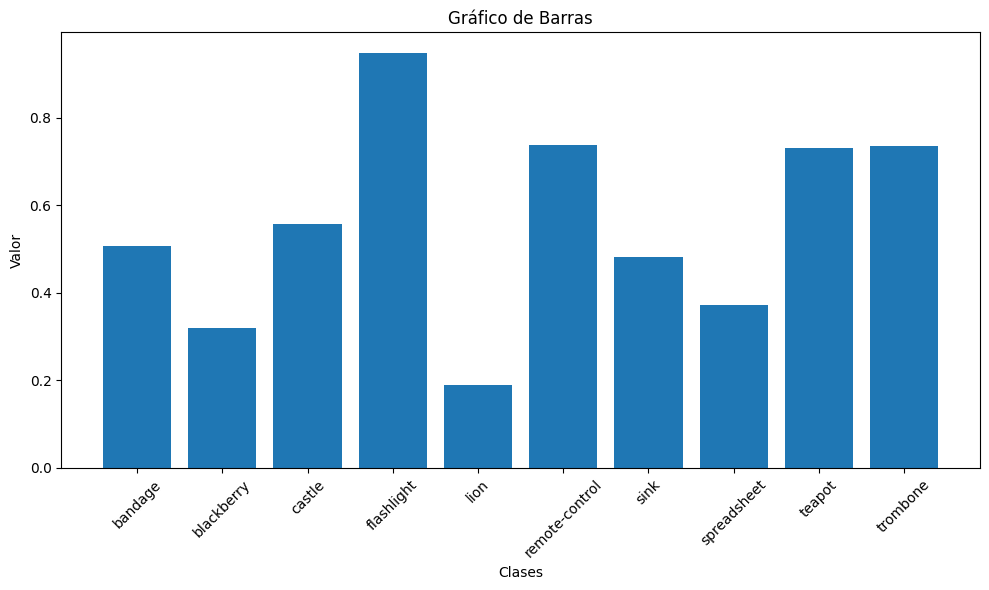

In [7]:
data = {'bandage': 0.5083333333333333,
  'blackberry': 0.319672131147541,
  'castle': 0.5572519083969466,
  'flashlight': 0.9482758620689655,
  'lion': 0.19047619047619047,
  'remote-control': 0.7378640776699029,
  'sink': 0.4827586206896552,
  'spreadsheet': 0.371900826446281,
  'teapot': 0.7307692307692307,
  'trombone': 0.7352941176470589}
plot_bar_chart(data)

In [18]:
acc_total_1

[0.5240137221269296,
 0.5849056603773585,
 0.4502572898799314,
 0.5574614065180102,
 0.62778730703259]

In [19]:
cm_1

[array([[ 51,   1,  23,  30,   1,   6,   0,   6,   0,   2],
        [  3,  26,  30,  44,   1,   1,   0,  10,   2,   5],
        [  0,   0, 113,   1,   0,   3,   1,   8,   0,   5],
        [  1,   0,   9,  96,   0,   0,   0,   9,   1,   0],
        [  1,   0,   3,   8,   2,   0,   0,  73,   9,   9],
        [  0,   0,  28,   1,   1,  66,   1,   4,   1,   1],
        [  0,   3,  60,   4,   0,  12,  31,   5,   0,   1],
        [  0,   0,   6,   7,   0,   4,   1,  97,   2,   4],
        [  2,   2,   4,   8,   1,   4,   0,  17,  92,   0],
        [  0,   0,  16,  13,   2,   3,   0,  30,   1,  37]]),
 array([[ 58,   2,  20,  16,   2,   3,   7,   1,  11,   0],
        [  4,  47,  21,  30,   3,   1,   8,   0,   8,   0],
        [  0,   0, 104,   3,   2,   2,  14,   0,   2,   4],
        [  1,   0,   9,  99,   4,   0,   0,   0,   3,   0],
        [  1,   0,   5,  10,  55,   0,   1,   0,  27,   6],
        [  0,   1,  15,   0,   3,  58,  21,   0,   5,   0],
        [  0,   2,  24,   0,   2,   6,

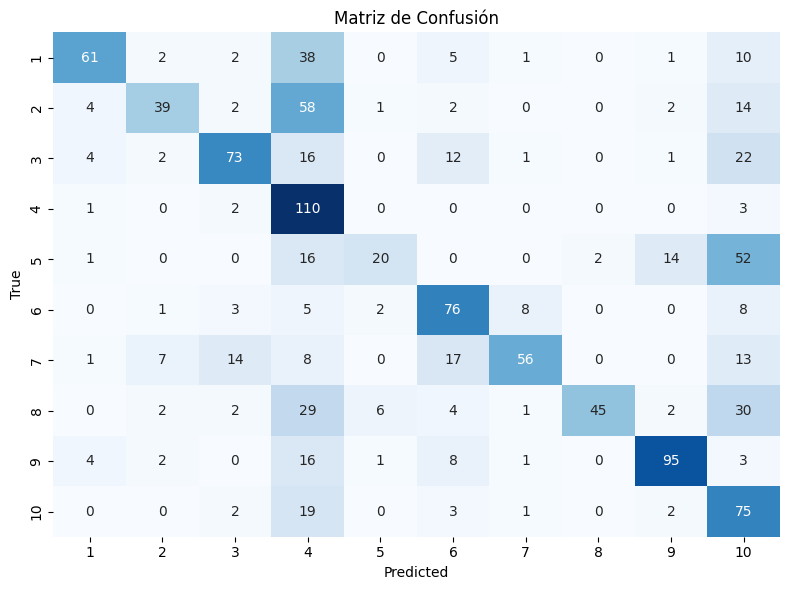

In [15]:
data = np.array([[ 61,   2,   2,  38,   0,   5,   1,   0,   1,  10],
        [  4,  39,   2,  58,   1,   2,   0,   0,   2,  14],
        [  4,   2,  73,  16,   0,  12,   1,   0,   1,  22],
        [  1,   0,   2, 110,   0,   0,   0,   0,   0,   3],
        [  1,   0,   0,  16,  20,   0,   0,   2,  14,  52],
        [  0,   1,   3,   5,   2,  76,   8,   0,   0,   8],
        [  1,   7,  14,   8,   0,  17,  56,   0,   0,  13],
        [  0,   2,   2,  29,   6,   4,   1,  45,   2,  30],
        [  4,   2,   0,  16,   1,   8,   1,   0,  95,   3],
        [  0,   0,   2,  19,   0,   3,   1,   0,   2,  75]])
plot_confusion_matrix(data)

In [20]:
# Modelo 2 - QuickDraw-10
# Detalles:
# Activacion: sigmoid
# Perdida: CrossEntropy
# Capas: 3
# Epocas: 20
# Batch size: 1000

acc_total_2, acc_clase_2, cm_2 = experiment(
        train_images_10,
        train_labels_10,
        val_image_10,
        val_labels_10,
        test_images_10,
        test_labels_10,
        layers_size=[512, 256, 128],
        n_classes=10,
        activation='sigmoid',
        loss_fn='categorical_hinge',
        class_names=clases,
        epochs=50,
        batch_size=128,
        n_experiments=5
        )


Entrenamiento número 1


c:\Users\vicen\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'mlp_5', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 193ms/step - accuracy: 0.0912 - loss: 1.0349 - val_accuracy: 0.1037 - val_loss: 1.0106
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 182ms/step - accuracy: 0.0950 - loss: 1.0093 - val_accuracy: 0.0711 - val_loss: 1.0070
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 178ms/step - accuracy: 0.0956 - loss: 1.0066 - val_accuracy: 0.1199 - val_loss: 1.0053
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 189ms/step - accuracy: 0.1127 - loss: 1.0046 - val_accuracy: 0.1023 - val_loss: 1.0029
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 180ms/step - accuracy: 0.1172 - loss: 1.0019 - val_accuracy: 0.1301 - val_loss: 1.0010
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 178ms/step - accuracy: 0.1350 - loss: 1.0009 - val_accuracy: 0.1612 - val_loss: 1.0011
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 187ms/step - accuracy: 0.1490 - loss: 1.0009 - val_accuracy: 0.1592 - val_loss: 1.0009
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 188ms/step - accuracy: 0.1571 - loss: 1.0008 - val_accu

c:\Users\vicen\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'mlp_6', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 174ms/step - accuracy: 0.0891 - loss: 1.0768 - val_accuracy: 0.0779 - val_loss: 1.0382
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 163ms/step - accuracy: 0.0976 - loss: 1.0351 - val_accuracy: 0.0827 - val_loss: 1.0289
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 162ms/step - accuracy: 0.0933 - loss: 1.0272 - val_accuracy: 0.0854 - val_loss: 1.0237
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 160ms/step - accuracy: 0.1000 - loss: 1.0220 - val_accuracy: 0.0718 - val_loss: 1.0163
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - accuracy: 0.1224 - loss: 1.0147 - val_accuracy: 0.1037 - val_loss: 1.0122
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 162ms/step - accuracy: 0.1299 - loss: 1.0108 - val_accuracy: 0.1125 - val_loss: 1.0080
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 162ms/step - accuracy: 0.1348 - loss: 1.0068 - val_accuracy: 0.1436 - val_loss: 1.0026
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 164ms/step - accuracy: 0.1419 - loss: 1.0017 - val_accu

c:\Users\vicen\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'mlp_7', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 170ms/step - accuracy: 0.1044 - loss: 1.0610 - val_accuracy: 0.1003 - val_loss: 1.0082
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 164ms/step - accuracy: 0.1383 - loss: 1.0044 - val_accuracy: 0.1382 - val_loss: 1.0012
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 162ms/step - accuracy: 0.1478 - loss: 1.0009 - val_accuracy: 0.1111 - val_loss: 1.0011
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 163ms/step - accuracy: 0.1439 - loss: 1.0009 - val_accuracy: 0.1301 - val_loss: 1.0009
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 165ms/step - accuracy: 0.1634 - loss: 1.0008 - val_accuracy: 0.1402 - val_loss: 1.0011
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 161ms/step - accuracy: 0.1775 - loss: 1.0008 - val_accuracy: 0.1606 - val_loss: 1.0008
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 163ms/step - accuracy: 0.1792 - loss: 1.0007 - val_accuracy: 0.1667 - val_loss: 1.0009
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 167ms/step - accuracy: 0.2133 - loss: 1.0007 - val_accu

c:\Users\vicen\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'mlp_8', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 176ms/step - accuracy: 0.1050 - loss: 1.0540 - val_accuracy: 0.1186 - val_loss: 1.0181
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 169ms/step - accuracy: 0.1188 - loss: 1.0152 - val_accuracy: 0.1172 - val_loss: 1.0074
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - accuracy: 0.1211 - loss: 1.0055 - val_accuracy: 0.0962 - val_loss: 1.0037
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 161ms/step - accuracy: 0.1332 - loss: 1.0029 - val_accuracy: 0.0752 - val_loss: 1.0014
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 169ms/step - accuracy: 0.1212 - loss: 1.0010 - val_accuracy: 0.1369 - val_loss: 1.0008
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 165ms/step - accuracy: 0.1379 - loss: 1.0009 - val_accuracy: 0.1633 - val_loss: 1.0008
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - accuracy: 0.1439 - loss: 1.0008 - val_accuracy: 0.1328 - val_loss: 1.0009
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 176ms/step - accuracy: 0.1484 - loss: 1.0008 - val_accu

c:\Users\vicen\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'mlp_9', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 168ms/step - accuracy: 0.0903 - loss: 1.0429 - val_accuracy: 0.1023 - val_loss: 1.0084
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 163ms/step - accuracy: 0.0824 - loss: 1.0064 - val_accuracy: 0.1037 - val_loss: 1.0012
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 162ms/step - accuracy: 0.0987 - loss: 1.0011 - val_accuracy: 0.1030 - val_loss: 1.0011
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 166ms/step - accuracy: 0.1089 - loss: 1.0010 - val_accuracy: 0.1003 - val_loss: 1.0009
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 163ms/step - accuracy: 0.1212 - loss: 1.0009 - val_accuracy: 0.1253 - val_loss: 1.0011
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 169ms/step - accuracy: 0.1300 - loss: 1.0009 - val_accuracy: 0.1050 - val_loss: 1.0012
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 167ms/step - accuracy: 0.1383 - loss: 1.0009 - val_accuracy: 0.1585 - val_loss: 1.0008
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - accuracy: 0.1502 - loss: 1.0008 - val_accu

In [21]:
acc_clase_2

[{'bandage': 0.16666666666666666,
  'blackberry': 0.00819672131147541,
  'castle': 0.030534351145038167,
  'flashlight': 0.3103448275862069,
  'lion': 0.3142857142857143,
  'remote-control': 0.6504854368932039,
  'sink': 0.05172413793103448,
  'spreadsheet': 0.0743801652892562,
  'teapot': 0.5230769230769231,
  'trombone': 0.029411764705882353},
 {'bandage': 0.13333333333333333,
  'blackberry': 0.01639344262295082,
  'castle': 0.25190839694656486,
  'flashlight': 0.13793103448275862,
  'lion': 0.009523809523809525,
  'remote-control': 0.2912621359223301,
  'sink': 0.19827586206896552,
  'spreadsheet': 0.19834710743801653,
  'teapot': 0.046153846153846156,
  'trombone': 0.46078431372549017},
 {'bandage': 0.1,
  'blackberry': 0.00819672131147541,
  'castle': 0.015267175572519083,
  'flashlight': 0.15517241379310345,
  'lion': 0.2761904761904762,
  'remote-control': 0.8543689320388349,
  'sink': 0.07758620689655173,
  'spreadsheet': 0.10743801652892562,
  'teapot': 0.38461538461538464,
  

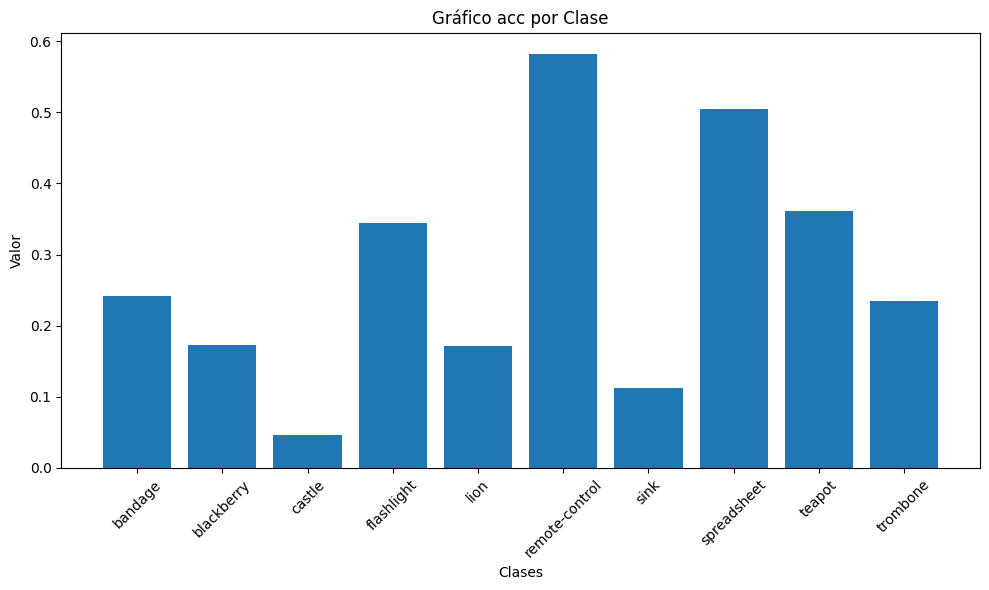

In [17]:
data = {'bandage': 0.24166666666666667,
  'blackberry': 0.1721311475409836,
  'castle': 0.04580152671755725,
  'flashlight': 0.3448275862068966,
  'lion': 0.17142857142857143,
  'remote-control': 0.5825242718446602,
  'sink': 0.11206896551724138,
  'spreadsheet': 0.5041322314049587,
  'teapot': 0.36153846153846153,
  'trombone': 0.23529411764705882}
plot_bar_chart(data)

In [22]:
acc_total_2

[0.2118353344768439,
 0.16981132075471697,
 0.2032590051457976,
 0.27358490566037735,
 0.17066895368782162]

In [23]:
cm_2

[array([[20,  0,  2, 21, 28, 25,  7,  5, 12,  0],
        [12,  1,  4, 25, 30, 17,  5,  5, 22,  1],
        [13,  0,  4, 21, 22, 39,  4, 10, 12,  6],
        [11,  1,  3, 36, 27, 10,  5,  4, 19,  0],
        [17,  0,  4,  5, 33, 25,  7,  6,  8,  0],
        [ 4,  0,  1,  4, 13, 67,  1,  1,  9,  3],
        [ 3,  0,  2, 16, 26, 47,  6,  6,  4,  6],
        [10,  0,  4, 14, 45, 16,  7,  9, 16,  0],
        [ 7,  0,  0,  5, 20, 23,  4,  2, 68,  1],
        [ 9,  0,  1, 16, 37, 18,  5,  9,  4,  3]]),
 array([[16,  1, 25,  2,  4,  4,  8, 14,  2, 44],
        [15,  2, 39,  4,  1,  1,  7, 12,  4, 37],
        [ 3,  0, 33,  3,  1, 12, 21, 22,  4, 32],
        [13,  2, 36, 16,  3,  4,  4, 10,  1, 27],
        [32,  6, 12,  3,  1,  5,  0,  9,  1, 36],
        [ 3,  1,  3,  0,  0, 30, 21,  9,  0, 36],
        [ 2,  0, 20,  4,  0,  7, 23, 15,  2, 43],
        [18,  0,  6,  4,  1,  2,  7, 24,  1, 58],
        [21,  3, 18,  9, 10, 13,  4, 10,  6, 36],
        [11,  2, 20,  3,  0,  3,  3, 10,  3, 47]

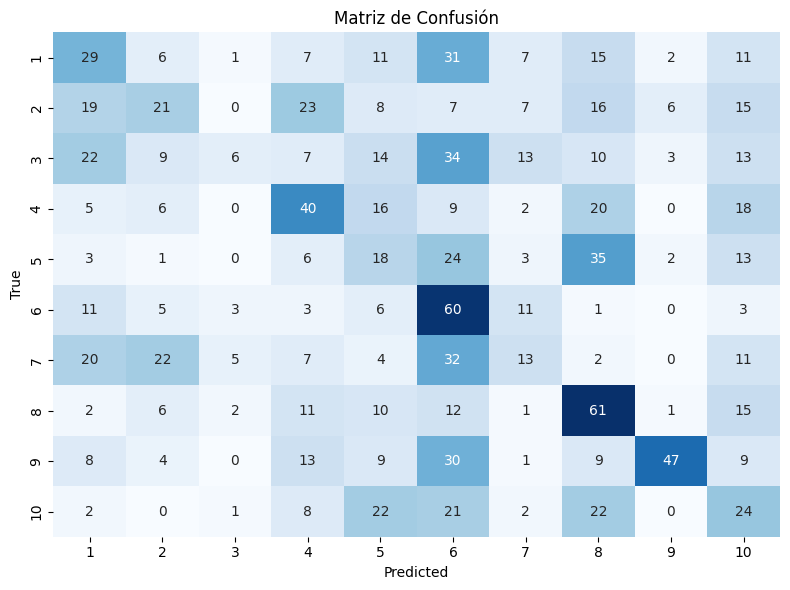

In [18]:
data = np.array([[29,  6,  1,  7, 11, 31,  7, 15,  2, 11],
        [19, 21,  0, 23,  8,  7,  7, 16,  6, 15],
        [22,  9,  6,  7, 14, 34, 13, 10,  3, 13],
        [ 5,  6,  0, 40, 16,  9,  2, 20,  0, 18],
        [ 3,  1,  0,  6, 18, 24,  3, 35,  2, 13],
        [11,  5,  3,  3,  6, 60, 11,  1,  0,  3],
        [20, 22,  5,  7,  4, 32, 13,  2,  0, 11],
        [ 2,  6,  2, 11, 10, 12,  1, 61,  1, 15],
        [ 8,  4,  0, 13,  9, 30,  1,  9, 47,  9],
        [ 2,  0,  1,  8, 22, 21,  2, 22,  0, 24]])
plot_confusion_matrix(data)

In [24]:
# Modelo 3 - QuickDraw-10
# Detalles:
# Activacion: tanh
# Perdida: Categorical Hinge
# Capas: 4
# Epocas: 100
# Batch size: 512

acc_total_3, acc_clase_3, cm_3 = experiment(
        train_images_10,
        train_labels_10,
        val_image_10,
        val_labels_10,
        test_images_10,
        test_labels_10,
        layers_size=[512, 256, 128, 64],
        n_classes=10,
        activation='tanh',
        loss_fn='categorical_hinge',
        class_names=clases,
        epochs=100,
        batch_size=512,
        n_experiments=5
        )


Entrenamiento número 1


c:\Users\vicen\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'mlp_10', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 357ms/step - accuracy: 0.0939 - loss: 1.1701 - val_accuracy: 0.1043 - val_loss: 1.0456
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 329ms/step - accuracy: 0.1070 - loss: 1.0445 - val_accuracy: 0.1030 - val_loss: 1.0389
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 335ms/step - accuracy: 0.0974 - loss: 1.0373 - val_accuracy: 0.0996 - val_loss: 1.0272
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 324ms/step - accuracy: 0.1010 - loss: 1.0266 - val_accuracy: 0.1077 - val_loss: 1.0235
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 315ms/step - accuracy: 0.1087 - loss: 1.0229 - val_accuracy: 0.1247 - val_loss: 1.0210
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 310ms/step - accuracy: 0.1188 - loss: 1.0202 - val_accuracy: 0.1043 - val_loss: 1.0182
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 312ms/step - accuracy: 0.1314 - loss: 1.0141 - val_accuracy: 0.1023 - val_loss: 1.0138
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 310ms/step - accuracy: 0.1258 - loss: 1.0126 - val_accu

c:\Users\vicen\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'mlp_11', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 415ms/step - accuracy: 0.1028 - loss: 1.1509 - val_accuracy: 0.0989 - val_loss: 1.0618
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 324ms/step - accuracy: 0.1060 - loss: 1.0530 - val_accuracy: 0.1301 - val_loss: 1.0316
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 319ms/step - accuracy: 0.1076 - loss: 1.0333 - val_accuracy: 0.1362 - val_loss: 1.0231
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 318ms/step - accuracy: 0.1206 - loss: 1.0233 - val_accuracy: 0.1247 - val_loss: 1.0186
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 331ms/step - accuracy: 0.1174 - loss: 1.0196 - val_accuracy: 0.1179 - val_loss: 1.0161
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 321ms/step - accuracy: 0.1224 - loss: 1.0172 - val_accuracy: 0.1009 - val_loss: 1.0206
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 314ms/step - accuracy: 0.1026 - loss: 1.0191 - val_accuracy: 0.1633 - val_loss: 1.0165
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 310ms/step - accuracy: 0.1501 - loss: 1.0167 - val_accu

c:\Users\vicen\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'mlp_12', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 339ms/step - accuracy: 0.0949 - loss: 1.1068 - val_accuracy: 0.0989 - val_loss: 1.0391
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 321ms/step - accuracy: 0.1122 - loss: 1.0314 - val_accuracy: 0.1023 - val_loss: 1.0285
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 324ms/step - accuracy: 0.1062 - loss: 1.0283 - val_accuracy: 0.1104 - val_loss: 1.0261
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 306ms/step - accuracy: 0.1225 - loss: 1.0256 - val_accuracy: 0.1057 - val_loss: 1.0265
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 318ms/step - accuracy: 0.1175 - loss: 1.0231 - val_accuracy: 0.1152 - val_loss: 1.0201
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 309ms/step - accuracy: 0.1241 - loss: 1.0186 - val_accuracy: 0.1274 - val_loss: 1.0166
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 324ms/step - accuracy: 0.1243 - loss: 1.0176 - val_accuracy: 0.1524 - val_loss: 1.0134
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 323ms/step - accuracy: 0.1379 - loss: 1.0150 - val_accu

c:\Users\vicen\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'mlp_13', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 358ms/step - accuracy: 0.1003 - loss: 1.1394 - val_accuracy: 0.1023 - val_loss: 1.0620
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 329ms/step - accuracy: 0.1136 - loss: 1.0534 - val_accuracy: 0.1159 - val_loss: 1.0350
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 316ms/step - accuracy: 0.1082 - loss: 1.0361 - val_accuracy: 0.1118 - val_loss: 1.0310
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 319ms/step - accuracy: 0.1092 - loss: 1.0284 - val_accuracy: 0.1145 - val_loss: 1.0177
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 334ms/step - accuracy: 0.1135 - loss: 1.0184 - val_accuracy: 0.1565 - val_loss: 1.0155
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 318ms/step - accuracy: 0.1326 - loss: 1.0177 - val_accuracy: 0.1152 - val_loss: 1.0163
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 313ms/step - accuracy: 0.1187 - loss: 1.0181 - val_accuracy: 0.1226 - val_loss: 1.0194
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 315ms/step - accuracy: 0.1275 - loss: 1.0183 - val_accu

c:\Users\vicen\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'mlp_14', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 345ms/step - accuracy: 0.0990 - loss: 1.2119 - val_accuracy: 0.1104 - val_loss: 1.0769
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 320ms/step - accuracy: 0.1097 - loss: 1.0562 - val_accuracy: 0.1416 - val_loss: 1.0354
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 314ms/step - accuracy: 0.1067 - loss: 1.0360 - val_accuracy: 0.1003 - val_loss: 1.0360
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 318ms/step - accuracy: 0.1120 - loss: 1.0331 - val_accuracy: 0.1192 - val_loss: 1.0304
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 318ms/step - accuracy: 0.1070 - loss: 1.0315 - val_accuracy: 0.1050 - val_loss: 1.0293
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 310ms/step - accuracy: 0.1135 - loss: 1.0305 - val_accuracy: 0.1131 - val_loss: 1.0335
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 334ms/step - accuracy: 0.1079 - loss: 1.0302 - val_accuracy: 0.1165 - val_loss: 1.0278
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 319ms/step - accuracy: 0.1108 - loss: 1.0292 - val_accu

In [25]:
acc_clase_3

[{'bandage': 0.016666666666666666,
  'blackberry': 0.0,
  'castle': 0.0,
  'flashlight': 0.0,
  'lion': 0.9904761904761905,
  'remote-control': 0.3592233009708738,
  'sink': 0.0,
  'spreadsheet': 0.0,
  'teapot': 0.023076923076923078,
  'trombone': 0.0},
 {'bandage': 0.0,
  'blackberry': 0.0,
  'castle': 0.4351145038167939,
  'flashlight': 0.0,
  'lion': 0.01904761904761905,
  'remote-control': 0.7475728155339806,
  'sink': 0.0,
  'spreadsheet': 0.0,
  'teapot': 0.0,
  'trombone': 0.0},
 {'bandage': 0.0,
  'blackberry': 0.00819672131147541,
  'castle': 0.0,
  'flashlight': 0.3275862068965517,
  'lion': 0.009523809523809525,
  'remote-control': 0.8640776699029126,
  'sink': 0.0,
  'spreadsheet': 0.04132231404958678,
  'teapot': 0.23076923076923078,
  'trombone': 0.21568627450980393},
 {'bandage': 0.008333333333333333,
  'blackberry': 0.0,
  'castle': 0.0,
  'flashlight': 0.0,
  'lion': 0.0,
  'remote-control': 0.47572815533980584,
  'sink': 0.008620689655172414,
  'spreadsheet': 0.0,
  

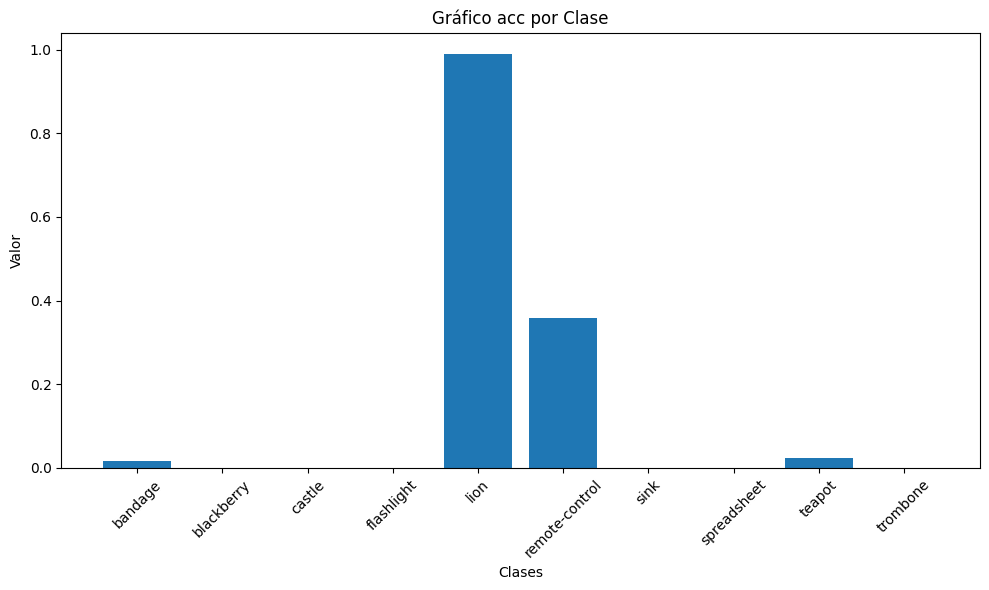

In [19]:
data = {'bandage': 0.016666666666666666,
  'blackberry': 0.0,
  'castle': 0.0,
  'flashlight': 0.0,
  'lion': 0.9904761904761905,
  'remote-control': 0.3592233009708738,
  'sink': 0.0,
  'spreadsheet': 0.0,
  'teapot': 0.023076923076923078,
  'trombone': 0.0}
plot_bar_chart(data)

In [26]:
acc_total_3

[0.12521440823327615,
 0.11663807890222985,
 0.1595197255574614,
 0.15265866209262435,
 0.11578044596912522]

In [27]:
cm_3

[array([[  2,   0,   0,   0, 117,   1,   0,   0,   0,   0],
        [  1,   0,   0,   0, 121,   0,   0,   0,   0,   0],
        [  1,   1,   0,   0, 120,   6,   0,   0,   3,   0],
        [  0,   0,   0,   0, 116,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0, 104,   0,   0,   0,   1,   0],
        [  1,   0,   2,   1,  60,  37,   0,   0,   2,   0],
        [  1,   0,   0,   1,  96,  15,   0,   0,   3,   0],
        [  0,   0,   0,   0, 118,   3,   0,   0,   0,   0],
        [  1,   0,   0,   0, 126,   0,   0,   0,   3,   0],
        [  0,   0,   0,   0, 101,   1,   0,   0,   0,   0]]),
 array([[ 0,  0, 48,  0,  4, 67,  1,  0,  0,  0],
        [ 0,  0, 81,  0,  4, 37,  0,  0,  0,  0],
        [ 0,  0, 57,  0,  0, 73,  1,  0,  0,  0],
        [ 0,  0, 75,  0,  3, 38,  0,  0,  0,  0],
        [ 0,  0, 73,  0,  2, 30,  0,  0,  0,  0],
        [ 0,  0, 26,  0,  0, 77,  0,  0,  0,  0],
        [ 0,  0, 30,  0,  0, 84,  0,  2,  0,  0],
        [ 0,  0, 86,  0,  2, 33,  0,  0,  0,  0]

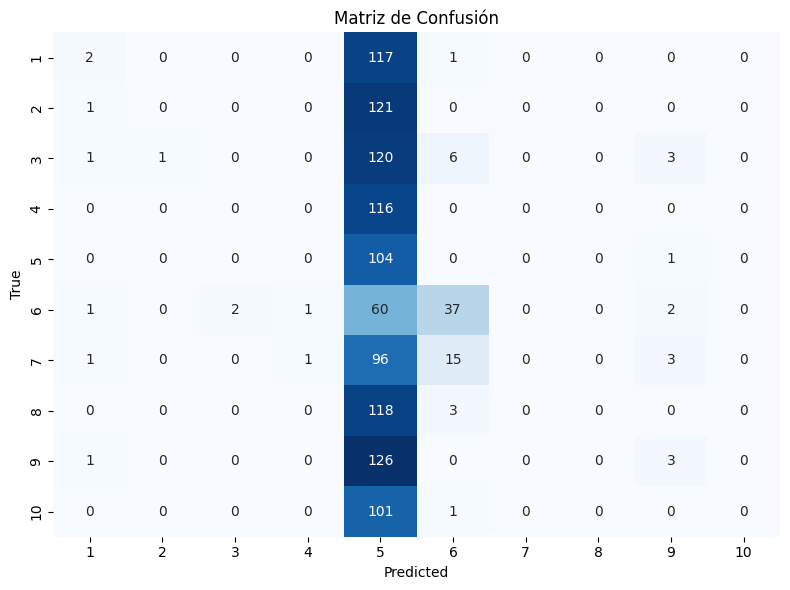

In [ ]:
data = np.array([[  2,   0,   0,   0, 117,   1,   0,   0,   0,   0],
        [  1,   0,   0,   0, 121,   0,   0,   0,   0,   0],
        [  1,   1,   0,   0, 120,   6,   0,   0,   3,   0],
        [  0,   0,   0,   0, 116,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0, 104,   0,   0,   0,   1,   0],
        [  1,   0,   2,   1,  60,  37,   0,   0,   2,   0],
        [  1,   0,   0,   1,  96,  15,   0,   0,   3,   0],
        [  0,   0,   0,   0, 118,   3,   0,   0,   0,   0],
        [  1,   0,   0,   0, 126,   0,   0,   0,   3,   0],
        [  0,   0,   0,   0, 101,   1,   0,   0,   0,   0]])
plot_confusion_matrix(data)

Experimentos para QuickDraw-Animals

In [16]:
clases = ['sheep', 'bear', 'bee', 'cat', 'camel', 'cow', 'crab', 'crocodile', 'duck', 'elephant', 'dog', 'giraffe']

In [30]:
# Modelo 1 - QuickDraw-Animals
# Detalles:
# Activacion: tanh
# Perdida: categorical_hinge
# Capas: 2
# Epocas: 60
# Batch size: 550

acc_total_4, acc_clase_4, cm_4 = experiment(
        train_images_animals,
        train_labels_animals,
        val_images_animals,
        val_labels_animals,
        test_images_animals,
        test_labels_animals,
        layers_size=[512,256],
        n_classes=12,
        activation='sigmoid',
        loss_fn='categorical_crossentropy',
        class_names=clases,
        epochs=20,
        batch_size=32,
        n_experiments=5
        )


Entrenamiento número 1


c:\Users\vicen\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'mlp_16', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 33s 98ms/step - accuracy: 0.0963 - loss: 2.5023 - val_accuracy: 0.1161 - val_loss: 2.4685
Epoch 2/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 30s 92ms/step - accuracy: 0.1416 - loss: 2.4436 - val_accuracy: 0.0856 - val_loss: 2.4171
Epoch 3/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 30s 93ms/step - accuracy: 0.2122 - loss: 2.3572 - val_accuracy: 0.2922 - val_loss: 2.2833
Epoch 4/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 30s 93ms/step - accuracy: 0.2561 - loss: 2.2615 - val_accuracy: 0.2906 - val_loss: 2.1848
Epoch 5/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 29s 91ms/step - accuracy: 0.3035 - loss: 2.1509 - val_accuracy: 0.3383 - val_loss: 2.0856
Epoch 6/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 29s 92ms/step - accuracy: 0.3427 - loss: 2.0544 - val_accuracy: 0.3444 - val_loss: 2.0594
Epoch 7/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 29s 92ms/step - accuracy: 0.3579 - loss: 1.9956 - val_accuracy: 0.3111 - val_loss: 2.0389
Epoch 8/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 29s 92ms/step - accuracy: 0.3776 - loss: 1.9259 - 

c:\Users\vicen\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'mlp_17', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 31s 93ms/step - accuracy: 0.0981 - loss: 2.4976 - val_accuracy: 0.0978 - val_loss: 2.4613
Epoch 2/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 30s 95ms/step - accuracy: 0.1591 - loss: 2.4237 - val_accuracy: 0.2506 - val_loss: 2.3581
Epoch 3/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 30s 93ms/step - accuracy: 0.2175 - loss: 2.3286 - val_accuracy: 0.2422 - val_loss: 2.2682
Epoch 4/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 29s 91ms/step - accuracy: 0.2703 - loss: 2.2214 - val_accuracy: 0.2194 - val_loss: 2.1900
Epoch 5/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 29s 90ms/step - accuracy: 0.3096 - loss: 2.1226 - val_accuracy: 0.3511 - val_loss: 2.0736
Epoch 6/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 29s 91ms/step - accuracy: 0.3470 - loss: 2.0356 - val_accuracy: 0.2900 - val_loss: 2.0880
Epoch 7/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 29s 91ms/step - accuracy: 0.3610 - loss: 1.9635 - val_accuracy: 0.2950 - val_loss: 2.0375
Epoch 8/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 29s 92ms/step - accuracy: 0.3793 - loss: 1.9171 - 

c:\Users\vicen\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'mlp_18', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 30s 90ms/step - accuracy: 0.0891 - loss: 2.5011 - val_accuracy: 0.1800 - val_loss: 2.4382
Epoch 2/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 29s 90ms/step - accuracy: 0.1526 - loss: 2.4264 - val_accuracy: 0.2039 - val_loss: 2.3532
Epoch 3/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 29s 91ms/step - accuracy: 0.2348 - loss: 2.3260 - val_accuracy: 0.2028 - val_loss: 2.2882
Epoch 4/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 29s 91ms/step - accuracy: 0.2837 - loss: 2.2235 - val_accuracy: 0.2500 - val_loss: 2.2489
Epoch 5/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 29s 92ms/step - accuracy: 0.3147 - loss: 2.1211 - val_accuracy: 0.2461 - val_loss: 2.1210
Epoch 6/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 30s 92ms/step - accuracy: 0.3486 - loss: 2.0275 - val_accuracy: 0.3489 - val_loss: 2.0138
Epoch 7/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 29s 91ms/step - accuracy: 0.3583 - loss: 1.9682 - val_accuracy: 0.3844 - val_loss: 1.9594
Epoch 8/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 29s 92ms/step - accuracy: 0.3722 - loss: 1.9164 - 

c:\Users\vicen\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'mlp_19', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 31s 93ms/step - accuracy: 0.0969 - loss: 2.4981 - val_accuracy: 0.1111 - val_loss: 2.4492
Epoch 2/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 29s 90ms/step - accuracy: 0.1584 - loss: 2.4207 - val_accuracy: 0.1344 - val_loss: 2.3737
Epoch 3/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 29s 90ms/step - accuracy: 0.2237 - loss: 2.3201 - val_accuracy: 0.2378 - val_loss: 2.2431
Epoch 4/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 29s 91ms/step - accuracy: 0.2811 - loss: 2.2045 - val_accuracy: 0.3383 - val_loss: 2.1406
Epoch 5/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 29s 91ms/step - accuracy: 0.3230 - loss: 2.1128 - val_accuracy: 0.3483 - val_loss: 2.0755
Epoch 6/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 29s 90ms/step - accuracy: 0.3531 - loss: 2.0227 - val_accuracy: 0.2983 - val_loss: 2.1445
Epoch 7/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 29s 91ms/step - accuracy: 0.3629 - loss: 1.9815 - val_accuracy: 0.3900 - val_loss: 1.9851
Epoch 8/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 29s 91ms/step - accuracy: 0.3823 - loss: 1.9112 - 

c:\Users\vicen\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'mlp_20', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 30s 91ms/step - accuracy: 0.0992 - loss: 2.4955 - val_accuracy: 0.1311 - val_loss: 2.4486
Epoch 2/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 29s 90ms/step - accuracy: 0.1423 - loss: 2.4345 - val_accuracy: 0.2056 - val_loss: 2.3673
Epoch 3/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 29s 90ms/step - accuracy: 0.2301 - loss: 2.3380 - val_accuracy: 0.2439 - val_loss: 2.2923
Epoch 4/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 29s 90ms/step - accuracy: 0.2773 - loss: 2.2319 - val_accuracy: 0.3311 - val_loss: 2.1626
Epoch 5/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 29s 90ms/step - accuracy: 0.3108 - loss: 2.1357 - val_accuracy: 0.3517 - val_loss: 2.1327
Epoch 6/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 29s 91ms/step - accuracy: 0.3374 - loss: 2.0524 - val_accuracy: 0.3594 - val_loss: 2.0325
Epoch 7/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 29s 90ms/step - accuracy: 0.3629 - loss: 1.9776 - val_accuracy: 0.2694 - val_loss: 2.1245
Epoch 8/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 29s 92ms/step - accuracy: 0.3790 - loss: 1.9282 - 

In [31]:
acc_clase_4

[{'sheep': 0.445,
  'bear': 0.275,
  'bee': 0.725,
  'cat': 0.295,
  'camel': 0.355,
  'cow': 0.36,
  'crab': 0.465,
  'crocodile': 0.74,
  'duck': 0.19,
  'elephant': 0.61,
  'dog': 0.015,
  'giraffe': 0.8341708542713567},
 {'sheep': 0.81,
  'bear': 0.205,
  'bee': 0.48,
  'cat': 0.125,
  'camel': 0.375,
  'cow': 0.38,
  'crab': 0.585,
  'crocodile': 0.6,
  'duck': 0.16,
  'elephant': 0.185,
  'dog': 0.015,
  'giraffe': 0.8944723618090452},
 {'sheep': 0.535,
  'bear': 0.16,
  'bee': 0.365,
  'cat': 0.275,
  'camel': 0.67,
  'cow': 0.53,
  'crab': 0.345,
  'crocodile': 0.73,
  'duck': 0.15,
  'elephant': 0.16,
  'dog': 0.12,
  'giraffe': 0.8894472361809045},
 {'sheep': 0.52,
  'bear': 0.395,
  'bee': 0.545,
  'cat': 0.38,
  'camel': 0.525,
  'cow': 0.37,
  'crab': 0.575,
  'crocodile': 0.67,
  'duck': 0.21,
  'elephant': 0.51,
  'dog': 0.055,
  'giraffe': 0.8743718592964824},
 {'sheep': 0.515,
  'bear': 0.49,
  'bee': 0.715,
  'cat': 0.25,
  'camel': 0.315,
  'cow': 0.43,
  'crab': 0.4

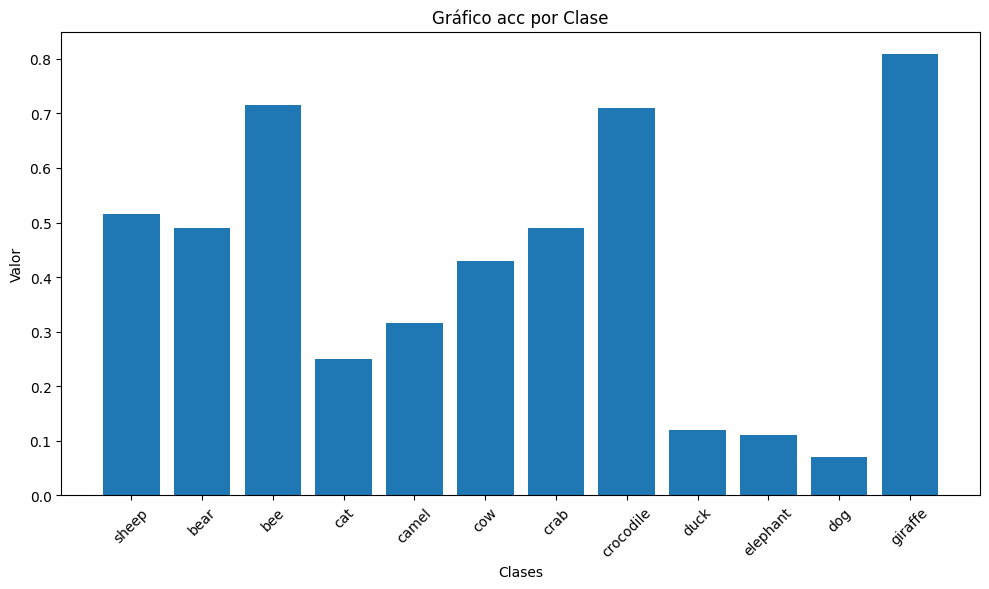

In [22]:
data = {'sheep': 0.515,
  'bear': 0.49,
  'bee': 0.715,
  'cat': 0.25,
  'camel': 0.315,
  'cow': 0.43,
  'crab': 0.49,
  'crocodile': 0.71,
  'duck': 0.12,
  'elephant': 0.11,
  'dog': 0.07,
  'giraffe': 0.8090452261306532}
plot_bar_chart(data)

In [32]:
acc_total_4

[0.44226761150479366,
 0.40100041684035015,
 0.4105877448937057,
 0.46894539391413087,
 0.4185077115464777]

In [33]:
cm_4

[array([[ 89,   5,   3,   2,  15,  32,  11,   6,   4,  30,   3,   0],
        [ 16,  55,  18,  13,  10,   8,   9,   5,   8,  46,   2,  10],
        [  0,   1, 145,   3,   0,  22,   6,   8,   1,  12,   0,   2],
        [  1,  11,  38,  59,  13,  19,  20,  15,   2,  20,   0,   2],
        [  9,   4,   8,   6,  71,   9,  18,  12,   5,  49,   2,   7],
        [ 13,   3,  36,   3,   8,  72,  17,  10,   1,  33,   2,   2],
        [  4,   1,  16,  10,   3,  16,  93,  39,   1,  15,   0,   2],
        [  1,   0,   9,   1,   3,   4,  14, 148,   2,  18,   0,   0],
        [  3,   8,  18,   3,  24,   8,   8,  13,  38,  64,   2,  11],
        [  4,   6,  27,   1,   4,  10,   5,  15,   3, 122,   0,   3],
        [  7,   6,  17,   6,   8,  25,  28,  34,   4,  59,   3,   3],
        [  0,   0,  12,   6,   3,   0,   4,   1,   4,   3,   0, 166]]),
 array([[162,   0,   2,   0,   7,  11,   9,   2,   4,   1,   0,   2],
        [ 59,  41,   6,   3,  23,  10,  12,   1,  14,   3,   2,  26],
        [  6,   1,

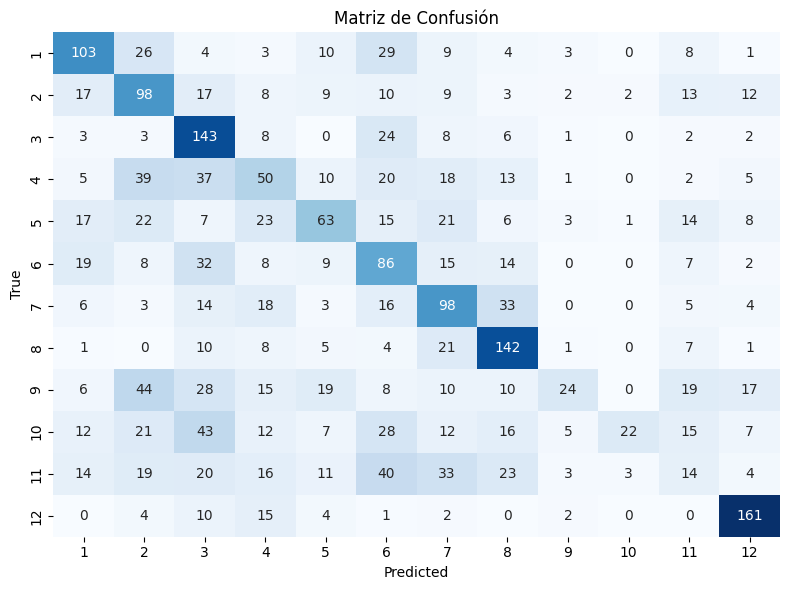

In [23]:
data = np.array([[103,  26,   4,   3,  10,  29,   9,   4,   3,   0,   8,   1],
        [ 17,  98,  17,   8,   9,  10,   9,   3,   2,   2,  13,  12],
        [  3,   3, 143,   8,   0,  24,   8,   6,   1,   0,   2,   2],
        [  5,  39,  37,  50,  10,  20,  18,  13,   1,   0,   2,   5],
        [ 17,  22,   7,  23,  63,  15,  21,   6,   3,   1,  14,   8],
        [ 19,   8,  32,   8,   9,  86,  15,  14,   0,   0,   7,   2],
        [  6,   3,  14,  18,   3,  16,  98,  33,   0,   0,   5,   4],
        [  1,   0,  10,   8,   5,   4,  21, 142,   1,   0,   7,   1],
        [  6,  44,  28,  15,  19,   8,  10,  10,  24,   0,  19,  17],
        [ 12,  21,  43,  12,   7,  28,  12,  16,   5,  22,  15,   7],
        [ 14,  19,  20,  16,  11,  40,  33,  23,   3,   3,  14,   4],
        [  0,   4,  10,  15,   4,   1,   2,   0,   2,   0,   0, 161]])
plot_confusion_matrix(data)

In [34]:
# Modelo 2 - QuickDraw-Animals
# Detalles:
# Activacion: tanh
# Perdida: categorical_crossentropy
# Capas: 2
# Epocas: 10
# Batch size: 1000

acc_total_5, acc_clase_5, cm_5 = experiment(
        train_images_animals,
        train_labels_animals,
        val_images_animals,
        val_labels_animals,
        test_images_animals,
        test_labels_animals,
        layers_size=[512, 256, 128],
        n_classes=12,
        activation='sigmoid',
        loss_fn='categorical_hinge',
        class_names=clases,
        epochs=50,
        batch_size=128,
        n_experiments=5
        )


Entrenamiento número 1


c:\Users\vicen\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'mlp_21', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 15s 166ms/step - accuracy: 0.0864 - loss: 1.1001 - val_accuracy: 0.1056 - val_loss: 1.0240
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 160ms/step - accuracy: 0.0893 - loss: 1.0221 - val_accuracy: 0.0828 - val_loss: 1.0177
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 163ms/step - accuracy: 0.0953 - loss: 1.0160 - val_accuracy: 0.0989 - val_loss: 1.0104
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 159ms/step - accuracy: 0.0981 - loss: 1.0095 - val_accuracy: 0.0961 - val_loss: 1.0088
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 159ms/step - accuracy: 0.1059 - loss: 1.0083 - val_accuracy: 0.1117 - val_loss: 1.0069
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 158ms/step - accuracy: 0.1047 - loss: 1.0066 - val_accuracy: 0.1056 - val_loss: 1.0044
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 159ms/step - accuracy: 0.1076 - loss: 1.0038 - val_accuracy: 0.1056 - val_loss: 1.0012
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 161ms/step - accuracy: 0.1150 - loss: 1.0009 - val_accu

c:\Users\vicen\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'mlp_22', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 15s 166ms/step - accuracy: 0.0823 - loss: 1.0369 - val_accuracy: 0.0961 - val_loss: 1.0140
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 161ms/step - accuracy: 0.1002 - loss: 1.0119 - val_accuracy: 0.1006 - val_loss: 1.0069
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 166ms/step - accuracy: 0.1070 - loss: 1.0061 - val_accuracy: 0.1189 - val_loss: 1.0036
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 162ms/step - accuracy: 0.1149 - loss: 1.0026 - val_accuracy: 0.1133 - val_loss: 1.0006
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 163ms/step - accuracy: 0.1161 - loss: 1.0006 - val_accuracy: 0.1250 - val_loss: 1.0007
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 161ms/step - accuracy: 0.1179 - loss: 1.0006 - val_accuracy: 0.1222 - val_loss: 1.0006
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 161ms/step - accuracy: 0.1271 - loss: 1.0006 - val_accuracy: 0.1161 - val_loss: 1.0006
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 166ms/step - accuracy: 0.1318 - loss: 1.0006 - val_accu

c:\Users\vicen\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'mlp_23', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 14s 161ms/step - accuracy: 0.0788 - loss: 1.0779 - val_accuracy: 0.0828 - val_loss: 1.0182
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 158ms/step - accuracy: 0.0766 - loss: 1.0179 - val_accuracy: 0.0822 - val_loss: 1.0157
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 164ms/step - accuracy: 0.0765 - loss: 1.0151 - val_accuracy: 0.0939 - val_loss: 1.0123
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 156ms/step - accuracy: 0.0853 - loss: 1.0113 - val_accuracy: 0.0900 - val_loss: 1.0083
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 157ms/step - accuracy: 0.0911 - loss: 1.0076 - val_accuracy: 0.0900 - val_loss: 1.0061
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 162ms/step - accuracy: 0.0874 - loss: 1.0055 - val_accuracy: 0.0972 - val_loss: 1.0045
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 161ms/step - accuracy: 0.0958 - loss: 1.0043 - val_accuracy: 0.1106 - val_loss: 1.0037
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 157ms/step - accuracy: 0.0948 - loss: 1.0035 - val_accu

c:\Users\vicen\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'mlp_24', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 14s 163ms/step - accuracy: 0.0821 - loss: 1.0563 - val_accuracy: 0.0950 - val_loss: 1.0146
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 156ms/step - accuracy: 0.0917 - loss: 1.0125 - val_accuracy: 0.0967 - val_loss: 1.0093
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 163ms/step - accuracy: 0.0918 - loss: 1.0081 - val_accuracy: 0.0883 - val_loss: 1.0042
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 156ms/step - accuracy: 0.1011 - loss: 1.0034 - val_accuracy: 0.0939 - val_loss: 1.0012
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 158ms/step - accuracy: 0.1004 - loss: 1.0008 - val_accuracy: 0.1033 - val_loss: 1.0007
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 161ms/step - accuracy: 0.0979 - loss: 1.0006 - val_accuracy: 0.1172 - val_loss: 1.0006
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 158ms/step - accuracy: 0.1022 - loss: 1.0006 - val_accuracy: 0.1156 - val_loss: 1.0006
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 155ms/step - accuracy: 0.1075 - loss: 1.0006 - val_accu

c:\Users\vicen\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'mlp_25', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 14s 167ms/step - accuracy: 0.0874 - loss: 1.0432 - val_accuracy: 0.0989 - val_loss: 1.0149
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 158ms/step - accuracy: 0.0816 - loss: 1.0123 - val_accuracy: 0.0828 - val_loss: 1.0058
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 160ms/step - accuracy: 0.0762 - loss: 1.0055 - val_accuracy: 0.0933 - val_loss: 1.0043
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 157ms/step - accuracy: 0.0862 - loss: 1.0040 - val_accuracy: 0.0961 - val_loss: 1.0034
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 162ms/step - accuracy: 0.0938 - loss: 1.0031 - val_accuracy: 0.0972 - val_loss: 1.0021
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 14s 171ms/step - accuracy: 0.0953 - loss: 1.0016 - val_accuracy: 0.1122 - val_loss: 1.0007
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 157ms/step - accuracy: 0.0968 - loss: 1.0006 - val_accuracy: 0.1033 - val_loss: 1.0006
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 155ms/step - accuracy: 0.1021 - loss: 1.0006 - val_accu

In [35]:
acc_clase_5

[{'sheep': 0.235,
  'bear': 0.065,
  'bee': 0.64,
  'cat': 0.025,
  'camel': 0.085,
  'cow': 0.15,
  'crab': 0.1,
  'crocodile': 0.525,
  'duck': 0.08,
  'elephant': 0.225,
  'dog': 0.025,
  'giraffe': 0.45226130653266333},
 {'sheep': 0.27,
  'bear': 0.19,
  'bee': 0.335,
  'cat': 0.025,
  'camel': 0.255,
  'cow': 0.03,
  'crab': 0.05,
  'crocodile': 0.51,
  'duck': 0.02,
  'elephant': 0.185,
  'dog': 0.07,
  'giraffe': 0.36683417085427134},
 {'sheep': 0.1,
  'bear': 0.23,
  'bee': 0.02,
  'cat': 0.01,
  'camel': 0.12,
  'cow': 0.135,
  'crab': 0.03,
  'crocodile': 0.105,
  'duck': 0.25,
  'elephant': 0.075,
  'dog': 0.03,
  'giraffe': 0.18592964824120603},
 {'sheep': 0.15,
  'bear': 0.15,
  'bee': 0.325,
  'cat': 0.08,
  'camel': 0.325,
  'cow': 0.155,
  'crab': 0.06,
  'crocodile': 0.22,
  'duck': 0.075,
  'elephant': 0.06,
  'dog': 0.085,
  'giraffe': 0.16080402010050251},
 {'sheep': 0.085,
  'bear': 0.19,
  'bee': 0.15,
  'cat': 0.17,
  'camel': 0.035,
  'cow': 0.26,
  'crab': 0.06

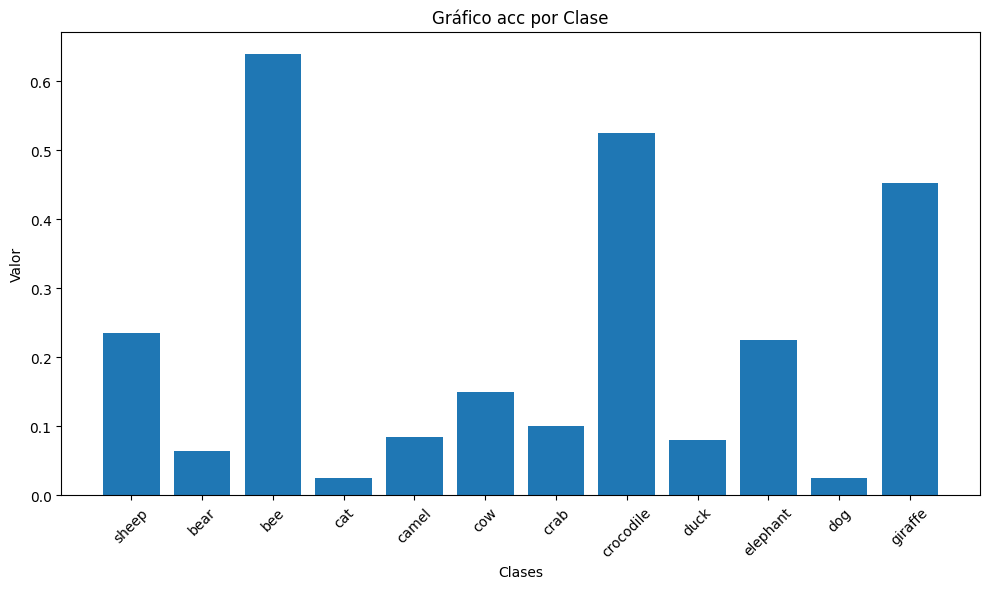

In [24]:
data = {'sheep': 0.235,
  'bear': 0.065,
  'bee': 0.64,
  'cat': 0.025,
  'camel': 0.085,
  'cow': 0.15,
  'crab': 0.1,
  'crocodile': 0.525,
  'duck': 0.08,
  'elephant': 0.225,
  'dog': 0.025,
  'giraffe': 0.45226130653266333}
plot_bar_chart(data)

In [36]:
acc_total_5

[0.21717382242601083,
 0.19216340141725718,
 0.10754481033764068,
 0.15381408920383494,
 0.15881617340558565]

In [37]:
cm_5

[array([[ 47,   2,  38,   0,  23,  25,   4,   9,   5,  34,   1,  12],
        [ 20,  13,  50,   1,  21,  19,   3,   1,  13,  29,   2,  28],
        [  6,   1, 128,   0,   5,  14,   3,   9,   5,  21,   2,   6],
        [ 19,  10,  66,   5,  10,  19,   6,  11,   9,  32,   6,   7],
        [ 31,   3,  26,   0,  17,  20,   7,  16,  20,  33,   1,  26],
        [ 20,   2,  67,   0,  14,  30,   5,  16,   3,  31,   3,   9],
        [ 21,   2,  44,   0,  15,  25,  20,  29,   9,  27,   2,   6],
        [  8,   1,  30,   0,   8,   5,   3, 105,   8,  18,   1,  13],
        [ 15,   4,  42,   1,  17,  10,   7,  23,  16,  33,   2,  30],
        [ 13,   2,  65,   1,  16,  10,   6,  19,  11,  45,   0,  12],
        [ 22,   0,  48,   1,  22,  27,   5,  27,   6,  23,   5,  14],
        [ 12,   1,  45,   0,  11,   6,   2,   4,  13,  15,   0,  90]]),
 array([[ 54,  27,   6,   7,  28,   5,  10,  10,   3,  24,  13,  13],
        [ 31,  38,  18,   7,  26,   9,   1,   4,  10,  23,   9,  24],
        [ 13,   5,

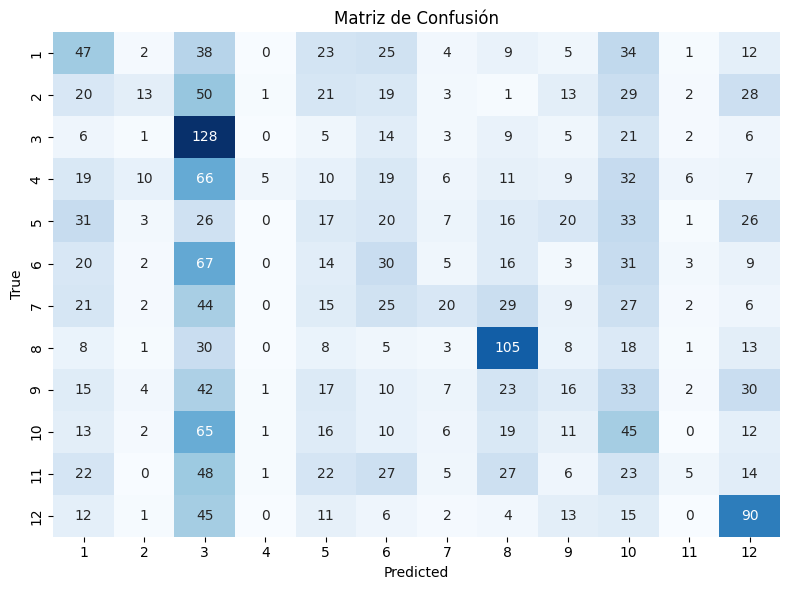

In [25]:
data = np.array([[ 47,   2,  38,   0,  23,  25,   4,   9,   5,  34,   1,  12],
        [ 20,  13,  50,   1,  21,  19,   3,   1,  13,  29,   2,  28],
        [  6,   1, 128,   0,   5,  14,   3,   9,   5,  21,   2,   6],
        [ 19,  10,  66,   5,  10,  19,   6,  11,   9,  32,   6,   7],
        [ 31,   3,  26,   0,  17,  20,   7,  16,  20,  33,   1,  26],
        [ 20,   2,  67,   0,  14,  30,   5,  16,   3,  31,   3,   9],
        [ 21,   2,  44,   0,  15,  25,  20,  29,   9,  27,   2,   6],
        [  8,   1,  30,   0,   8,   5,   3, 105,   8,  18,   1,  13],
        [ 15,   4,  42,   1,  17,  10,   7,  23,  16,  33,   2,  30],
        [ 13,   2,  65,   1,  16,  10,   6,  19,  11,  45,   0,  12],
        [ 22,   0,  48,   1,  22,  27,   5,  27,   6,  23,   5,  14],
        [ 12,   1,  45,   0,  11,   6,   2,   4,  13,  15,   0,  90]])
plot_confusion_matrix(data)

In [17]:
# Modelo 3 - QuickDraw-Animals
# Detalles:
# Activacion: sigmoid
# Perdida: kullback_leibler_divergence
# Capas: 2
# Epocas: 10
# Batch size: 1000

acc_total_6, acc_clase_6, cm_6 = experiment(
        train_images_animals,
        train_labels_animals,
        val_images_animals,
        val_labels_animals,
        test_images_animals,
        test_labels_animals,
        layers_size=[512, 256, 128, 64],
        n_classes=12,
        activation='tanh',
        loss_fn='categorical_hinge',
        class_names=clases,
        epochs=100,
        batch_size=512,
        n_experiments=5
        )


Entrenamiento número 1


c:\Users\vicen\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'mlp', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 408ms/step - accuracy: 0.0839 - loss: 1.1369 - val_accuracy: 0.0811 - val_loss: 1.0263
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 349ms/step - accuracy: 0.0837 - loss: 1.0243 - val_accuracy: 0.1044 - val_loss: 1.0178
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 318ms/step - accuracy: 0.0911 - loss: 1.0181 - val_accuracy: 0.1128 - val_loss: 1.0161
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 315ms/step - accuracy: 0.0917 - loss: 1.0164 - val_accuracy: 0.0872 - val_loss: 1.0160
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 310ms/step - accuracy: 0.0810 - loss: 1.0139 - val_accuracy: 0.1211 - val_loss: 1.0115
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 316ms/step - accuracy: 0.0956 - loss: 1.0125 - val_accuracy: 0.0922 - val_loss: 1.0141
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 310ms/step - accuracy: 0.0847 - loss: 1.0137 - val_accuracy: 0.0917 - val_loss: 1.0120
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 312ms/step - accuracy: 0.0931 - loss: 1.0124 - val_acc

c:\Users\vicen\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'mlp_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 402ms/step - accuracy: 0.0797 - loss: 1.1082 - val_accuracy: 0.0778 - val_loss: 1.0375
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 331ms/step - accuracy: 0.0880 - loss: 1.0292 - val_accuracy: 0.0867 - val_loss: 1.0203
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 325ms/step - accuracy: 0.0848 - loss: 1.0188 - val_accuracy: 0.0856 - val_loss: 1.0153
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 323ms/step - accuracy: 0.0922 - loss: 1.0141 - val_accuracy: 0.1128 - val_loss: 1.0110
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 326ms/step - accuracy: 0.1050 - loss: 1.0111 - val_accuracy: 0.0978 - val_loss: 1.0110
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 325ms/step - accuracy: 0.1048 - loss: 1.0106 - val_accuracy: 0.0861 - val_loss: 1.0104
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 326ms/step - accuracy: 0.0935 - loss: 1.0107 - val_accuracy: 0.0917 - val_loss: 1.0115
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 323ms/step - accuracy: 0.0879 - loss: 1.0112 - val_acc

c:\Users\vicen\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'mlp_2', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 359ms/step - accuracy: 0.0779 - loss: 1.0983 - val_accuracy: 0.0856 - val_loss: 1.0385
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 338ms/step - accuracy: 0.0855 - loss: 1.0337 - val_accuracy: 0.0861 - val_loss: 1.0216
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 323ms/step - accuracy: 0.0794 - loss: 1.0200 - val_accuracy: 0.0744 - val_loss: 1.0158
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 314ms/step - accuracy: 0.0829 - loss: 1.0151 - val_accuracy: 0.0939 - val_loss: 1.0125
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 315ms/step - accuracy: 0.0831 - loss: 1.0138 - val_accuracy: 0.0961 - val_loss: 1.0106
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 324ms/step - accuracy: 0.0882 - loss: 1.0124 - val_accuracy: 0.0961 - val_loss: 1.0096
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 360ms/step - accuracy: 0.0851 - loss: 1.0113 - val_accuracy: 0.0800 - val_loss: 1.0120
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 318ms/step - accuracy: 0.0870 - loss: 1.0125 - val_acc

c:\Users\vicen\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'mlp_3', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 344ms/step - accuracy: 0.0895 - loss: 1.1124 - val_accuracy: 0.0839 - val_loss: 1.0316
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 317ms/step - accuracy: 0.0850 - loss: 1.0284 - val_accuracy: 0.0833 - val_loss: 1.0237
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 315ms/step - accuracy: 0.0869 - loss: 1.0221 - val_accuracy: 0.0828 - val_loss: 1.0215
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 320ms/step - accuracy: 0.0932 - loss: 1.0204 - val_accuracy: 0.0878 - val_loss: 1.0197
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 314ms/step - accuracy: 0.0791 - loss: 1.0202 - val_accuracy: 0.0994 - val_loss: 1.0200
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 320ms/step - accuracy: 0.0940 - loss: 1.0189 - val_accuracy: 0.0844 - val_loss: 1.0197
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 313ms/step - accuracy: 0.0857 - loss: 1.0200 - val_accuracy: 0.0833 - val_loss: 1.0204
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 320ms/step - accuracy: 0.0919 - loss: 1.0188 - val_accu

c:\Users\vicen\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'mlp_4', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 641ms/step - accuracy: 0.0814 - loss: 1.1227 - val_accuracy: 0.0833 - val_loss: 1.0527
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 398ms/step - accuracy: 0.0906 - loss: 1.0453 - val_accuracy: 0.0828 - val_loss: 1.0402
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 396ms/step - accuracy: 0.0881 - loss: 1.0372 - val_accuracy: 0.0806 - val_loss: 1.0315
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 407ms/step - accuracy: 0.0995 - loss: 1.0289 - val_accuracy: 0.0828 - val_loss: 1.0272
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 395ms/step - accuracy: 0.0915 - loss: 1.0263 - val_accuracy: 0.0839 - val_loss: 1.0235
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 389ms/step - accuracy: 0.0889 - loss: 1.0238 - val_accuracy: 0.0889 - val_loss: 1.0199
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 404ms/step - accuracy: 0.0875 - loss: 1.0196 - val_accuracy: 0.1033 - val_loss: 1.0144
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 401ms/step - accuracy: 0.0904 - loss: 1.0133 - val_acc

In [18]:
acc_clase_6

[{'sheep': 0.885,
  'bear': 0.0,
  'bee': 0.0,
  'cat': 0.085,
  'camel': 0.0,
  'cow': 0.0,
  'crab': 0.105,
  'crocodile': 0.0,
  'duck': 0.0,
  'elephant': 0.025,
  'dog': 0.0,
  'giraffe': 0.0},
 {'sheep': 0.04,
  'bear': 0.0,
  'bee': 0.0,
  'cat': 0.0,
  'camel': 0.0,
  'cow': 0.005,
  'crab': 0.0,
  'crocodile': 0.0,
  'duck': 0.02,
  'elephant': 0.5,
  'dog': 0.57,
  'giraffe': 0.0},
 {'sheep': 0.295,
  'bear': 0.135,
  'bee': 0.0,
  'cat': 0.0,
  'camel': 0.04,
  'cow': 0.0,
  'crab': 0.04,
  'crocodile': 0.0,
  'duck': 0.0,
  'elephant': 0.36,
  'dog': 0.2,
  'giraffe': 0.0},
 {'sheep': 0.0,
  'bear': 0.0,
  'bee': 0.0,
  'cat': 0.0,
  'camel': 0.0,
  'cow': 0.0,
  'crab': 0.095,
  'crocodile': 0.09,
  'duck': 0.0,
  'elephant': 0.05,
  'dog': 0.005,
  'giraffe': 0.9798994974874372},
 {'sheep': 0.0,
  'bear': 0.47,
  'bee': 0.0,
  'cat': 0.0,
  'camel': 0.0,
  'cow': 0.015,
  'crab': 0.0,
  'crocodile': 0.0,
  'duck': 0.0,
  'elephant': 0.0,
  'dog': 0.67,
  'giraffe': 0.0}]

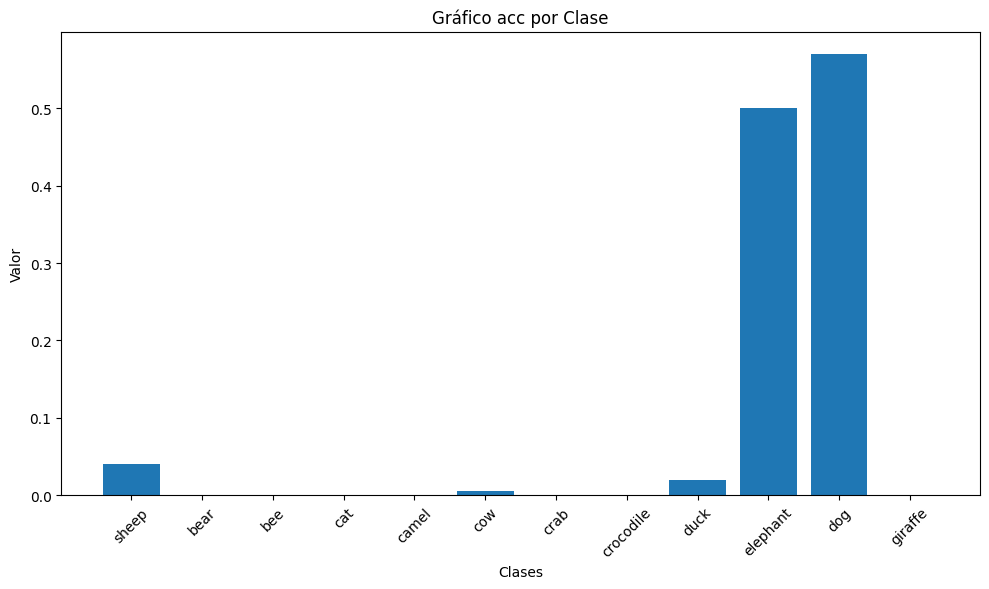

In [26]:
data = {'sheep': 0.04,
  'bear': 0.0,
  'bee': 0.0,
  'cat': 0.0,
  'camel': 0.0,
  'cow': 0.005,
  'crab': 0.0,
  'crocodile': 0.0,
  'duck': 0.02,
  'elephant': 0.5,
  'dog': 0.57,
  'giraffe': 0.0}
plot_bar_chart(data)

In [19]:
acc_total_6

[0.0917048770320967,
 0.09462275948311796,
 0.08920383493122135,
 0.10129220508545227,
 0.09629012088370154]

In [20]:
cm_6

[array([[177,   0,   0,   6,   0,   0,  11,   0,   0,   6,   0,   0],
        [167,   0,   0,  13,   0,   0,  17,   0,   0,   3,   0,   0],
        [128,   0,   0,  29,   1,   0,  32,   0,   0,  10,   0,   0],
        [166,   0,   0,  17,   1,   0,  14,   0,   0,   2,   0,   0],
        [179,   0,   0,   5,   0,   0,  14,   0,   0,   2,   0,   0],
        [144,   0,   0,  21,   1,   0,  33,   0,   0,   1,   0,   0],
        [173,   0,   0,   5,   0,   0,  21,   0,   0,   1,   0,   0],
        [178,   0,   0,   1,   0,   0,  21,   0,   0,   0,   0,   0],
        [175,   0,   0,   5,   0,   0,  19,   0,   0,   1,   0,   0],
        [170,   0,   0,   7,   0,   0,  18,   0,   0,   5,   0,   0],
        [171,   0,   0,   7,   0,   0,  16,   0,   0,   6,   0,   0],
        [166,   0,   0,  11,   0,   0,  19,   0,   0,   3,   0,   0]]),
 array([[  8,   0,   0,   0,   0,   0,   0,   0,   1,  87, 104,   0],
        [  4,   0,   0,   0,   0,   0,   0,   0,   4, 122,  70,   0],
        [  8,   0,

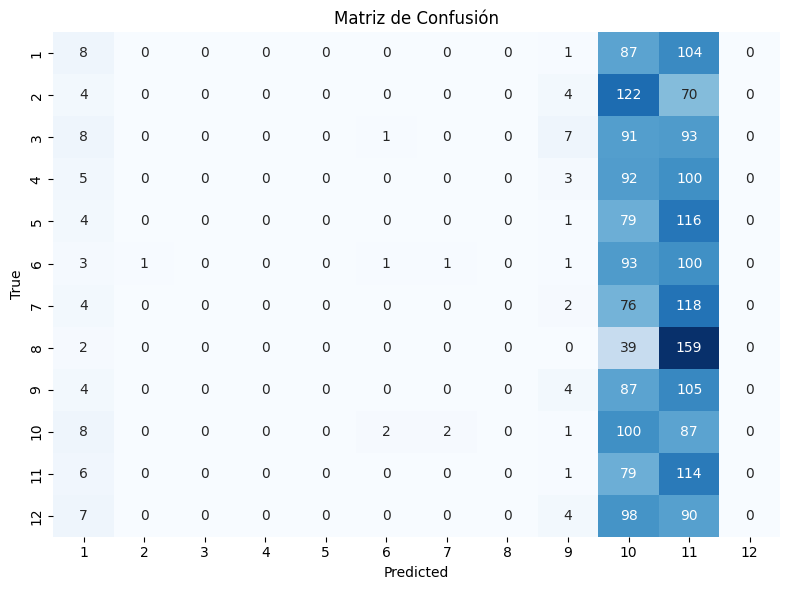

In [27]:
data = np.array([[  8,   0,   0,   0,   0,   0,   0,   0,   1,  87, 104,   0],
        [  4,   0,   0,   0,   0,   0,   0,   0,   4, 122,  70,   0],
        [  8,   0,   0,   0,   0,   1,   0,   0,   7,  91,  93,   0],
        [  5,   0,   0,   0,   0,   0,   0,   0,   3,  92, 100,   0],
        [  4,   0,   0,   0,   0,   0,   0,   0,   1,  79, 116,   0],
        [  3,   1,   0,   0,   0,   1,   1,   0,   1,  93, 100,   0],
        [  4,   0,   0,   0,   0,   0,   0,   0,   2,  76, 118,   0],
        [  2,   0,   0,   0,   0,   0,   0,   0,   0,  39, 159,   0],
        [  4,   0,   0,   0,   0,   0,   0,   0,   4,  87, 105,   0],
        [  8,   0,   0,   0,   0,   2,   2,   0,   1, 100,  87,   0],
        [  6,   0,   0,   0,   0,   0,   0,   0,   1,  79, 114,   0],
        [  7,   0,   0,   0,   0,   0,   0,   0,   4,  98,  90,   0]])

plot_confusion_matrix(data)